## Working with Tensorflow
In this assignment, you will be familiarized with the usage of the tensorflow library and how to build a model for the MNIST database in two ways
*   using the inbuilt layers in tensorflow
*   using custom layers to replicate the same result



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## Loading and preprocessing the Data
We will directly be using the dataset included in tensorflow library
A detailed description of data is given at (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Heres how the data looks

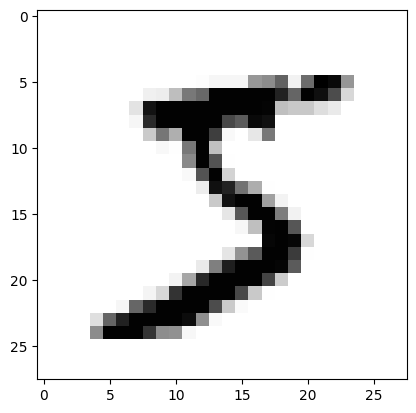

In [4]:
plt.imshow(x_train[0],cmap= 'Greys')

In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

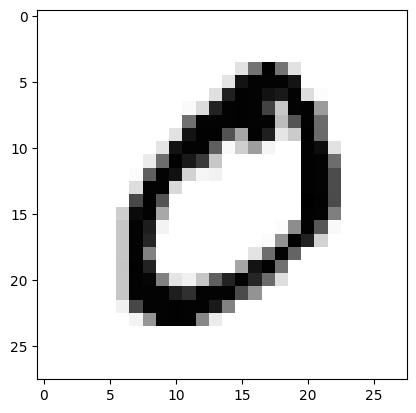

In [6]:
plt.imshow(x_train[1],cmap= 'Greys')

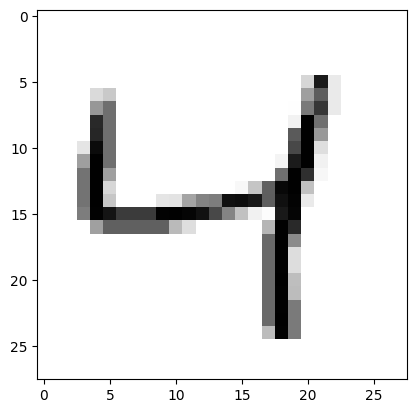

In [7]:
plt.imshow(x_train[2],cmap= 'Greys')

# Making a simple feedforward network
As you have seen in the second week a simple feedfordward network works well to solve MNIST.<br/>
The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [9]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8646 - loss: 0.4741 - val_accuracy: 0.9568 - val_loss: 0.1535
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.1300 - val_accuracy: 0.9675 - val_loss: 0.1113
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0879 - val_accuracy: 0.9711 - val_loss: 0.1013
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0603 - val_accuracy: 0.9709 - val_loss: 0.0945
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9724 - val_loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0948    
Test accuracy: 0.9750000238418579


## Making Custom Layers
You can go through this
<a href = 'https://www.tensorflow.org/tutorials/customization/custom_layers'> documentation </a> to get a feel for how to implement a custom layer

* Create a CustomDenseLayer with a Relu Activation
* Create a CustomDenseLayer with a Softmax Activation
* Create a CustomFlatten Layer

Altough we have provided solutions in the Next Cell Try to figure this out on your own.


In [10]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.softmax(z)
        return z

class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))



## Using out custom layers to Build a model for MNIST

In [11]:
# Example usage of the custom dense layer
model = Sequential([
    CustomFlattenLayer(),
    CustomDenseReluLayer(128),
    CustomDenseSoftmaxLayer(10)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8498 - loss: 0.5493 - val_accuracy: 0.9520 - val_loss: 0.1721
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9558 - loss: 0.1519 - val_accuracy: 0.9651 - val_loss: 0.1238
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9699 - loss: 0.1020 - val_accuracy: 0.9683 - val_loss: 0.1011
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9796 - loss: 0.0702 - val_accuracy: 0.9728 - val_loss: 0.0921
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0541 - val_accuracy: 0.9731 - val_loss: 0.0861
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.0902    
Test accuracy: 0.9751999974250793


# Assignment
* Load and preprocess Boston housing dataset
* build a Linear Regression model for it and optimize it using tensorflow (its basically a neural network with a single neuron and no activaton)
* build a Feedforward network for it you can expirement around with no of layers and and neurons in each layer and different activation functions <br/>





In [12]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [13]:
mean = tf.reduce_mean(x_train, axis=0)
std = tf.math.reduce_std(x_train, axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Making a linear regression model using a single neuron, no activation

In [14]:
regression_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),  # Input layer
    Dense(1)  # Single neuron (no activation, for linear regression)
])
regression_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history_log = regression_model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test), verbose=False)

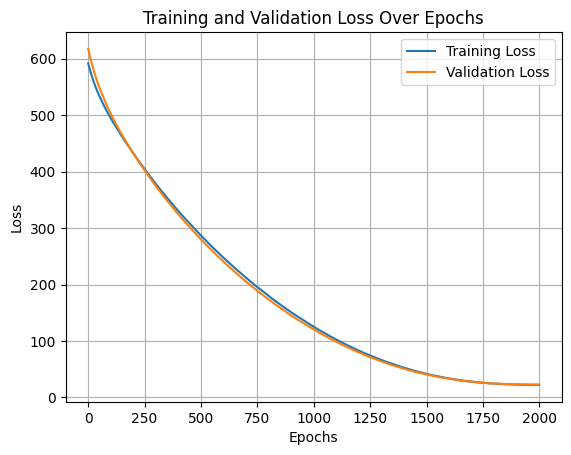

In [15]:
# Plot the training and validation loss
plt.plot(history_log.history['loss'], label='Training Loss')
plt.plot(history_log.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
predictions_rm = regression_model.predict(x_test)
for i in range(10):  # Display first 10 predictions and actual values
    print(f"Prediction: {predictions_rm[i][0]}, Actual: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 9.459821701049805, Actual: 7.2
Prediction: 21.105224609375, Actual: 18.8
Prediction: 20.32529067993164, Actual: 19.0
Prediction: 33.92982482910156, Actual: 27.0
Prediction: 25.463302612304688, Actual: 22.2
Prediction: 20.671586990356445, Actual: 24.5
Prediction: 28.279460906982422, Actual: 31.2
Prediction: 24.598154067993164, Actual: 22.9
Prediction: 18.792560577392578, Actual: 20.5
Prediction: 22.3258113861084, Actual: 23.2


In [17]:
class CustomDenseLinearLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseLinearLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        return z

In [18]:
feed_forward_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    CustomDenseReluLayer(64),
    CustomDenseReluLayer(64),
    CustomDenseLinearLayer(1)
])

feed_forward_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_fin = feed_forward_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test),verbose = False)

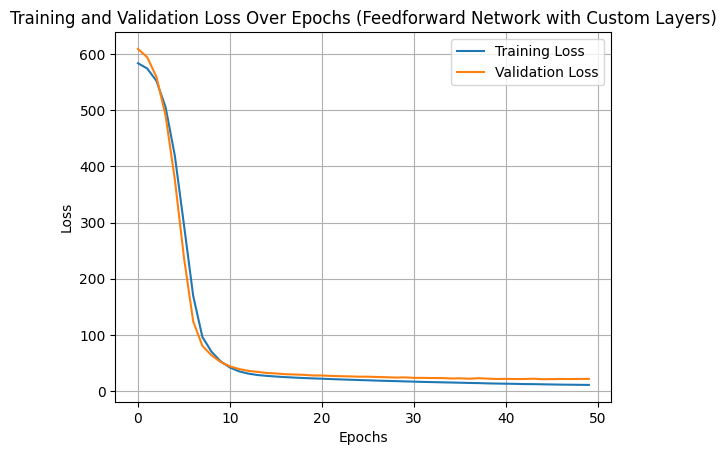

In [19]:
# Plot the training and validation loss for the feedforward model
plt.plot(history_fin.history['loss'], label='Training Loss')
plt.plot(history_fin.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs (Feedforward Network with Custom Layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
predictions_ffm = feed_forward_model.predict(x_test)
for i in range(10):
    print(f"Prediction - Regression Model : {predictions_rm[i][0]}, Prediction - Feed Forward Model: {predictions_ffm[i][0]}, Actual: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction - Regression Model : 9.459821701049805, Prediction - Feed Forward Model: 7.998867988586426, Actual: 7.2
Prediction - Regression Model : 21.105224609375, Prediction - Feed Forward Model: 17.01177215576172, Actual: 18.8
Prediction - Regression Model : 20.32529067993164, Prediction - Feed Forward Model: 21.618423461914062, Actual: 19.0
Prediction - Regression Model : 33.92982482910156, Prediction - Feed Forward Model: 36.72284698486328, Actual: 27.0
Prediction - Regression Model : 25.463302612304688, Prediction - Feed Forward Model: 25.988798141479492, Actual: 22.2
Prediction - Regression Model : 20.671586990356445, Prediction - Feed Forward Model: 17.564050674438477, Actual: 24.5
Prediction - Regression Model : 28.279460906982422, Prediction - Feed Forward Model: 26.091083526611328, Actual: 31.2
Prediction - Regression Model : 24.598154067993164, Prediction - Feed Forward Model: 22.792200088500977, Actual: 22.9
Prediction - Regression Mode

In [21]:
import pandas as pd
predictions_rm = regression_model.predict(x_test)
predictions_ffm = feed_forward_model.predict(x_test)
data = {
    'Actual': y_test.flatten(),
    'Prediction - Regression Model': predictions_rm.flatten(),
    'Prediction - Feed Forward Model': predictions_ffm.flatten()
}
predictions_df = pd.DataFrame(data)
print(predictions_df.head(102))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
     Actual  Prediction - Regression Model  Prediction - Feed Forward Model
0       7.2                       9.459822                         7.998868
1      18.8                      21.105225                        17.011772
2      19.0                      20.325291                        21.618423
3      27.0                      33.929825                        36.722847
4      22.2                      25.463303                        25.988798
..      ...                            ...                              ...
97     21.9                      38.789570                        45.731586
98     24.1                      25.262257                        27.402700
99     50.0                      41.508171                        48.802067
100    26.7                      34.198708                        32.497768
101    25.0                      24.869936                        20.332075

[102 rows x

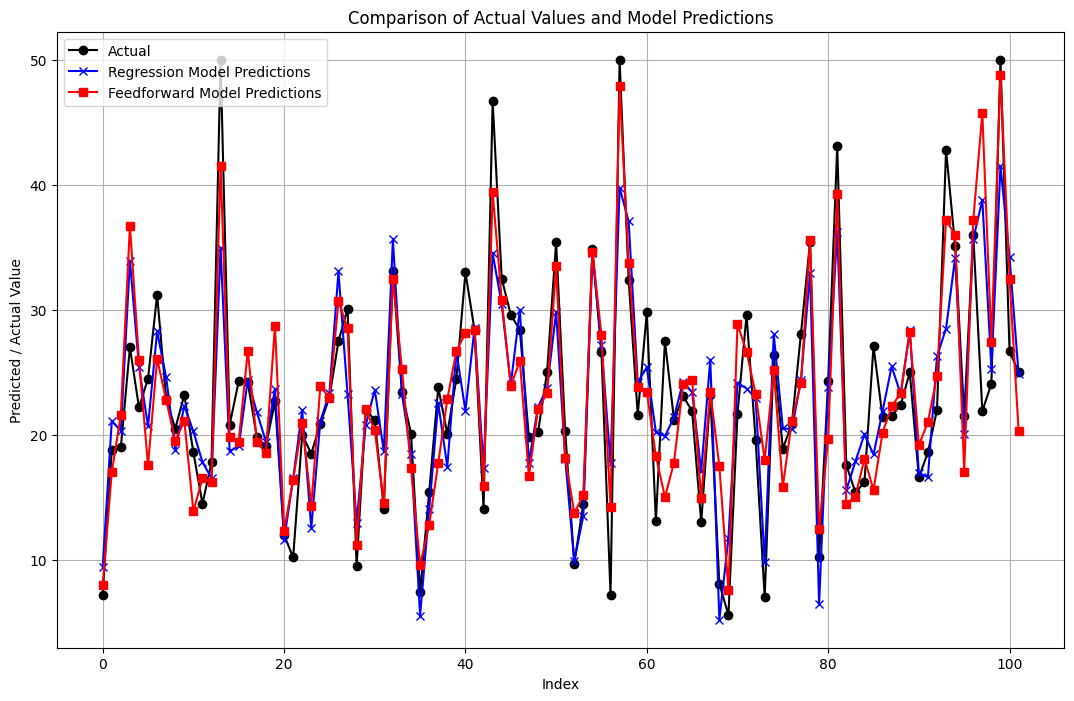

In [22]:
plt.figure(figsize=(13, 8))
plt.plot(y_test, label='Actual', color='black', linestyle='-', marker='o')
plt.plot(predictions_rm, label='Regression Model Predictions', color='blue', linestyle='-', marker='x')
plt.plot(predictions_ffm, label='Feedforward Model Predictions', color='red', linestyle='-', marker='s')
plt.xlabel('Index')
plt.ylabel('Predicted / Actual Value')
plt.title('Comparison of Actual Values and Model Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Bonus Assignment
* Try solving one more random dataset from kaggle/tensorflow datasets

# Predicting the Fashion Category using image

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


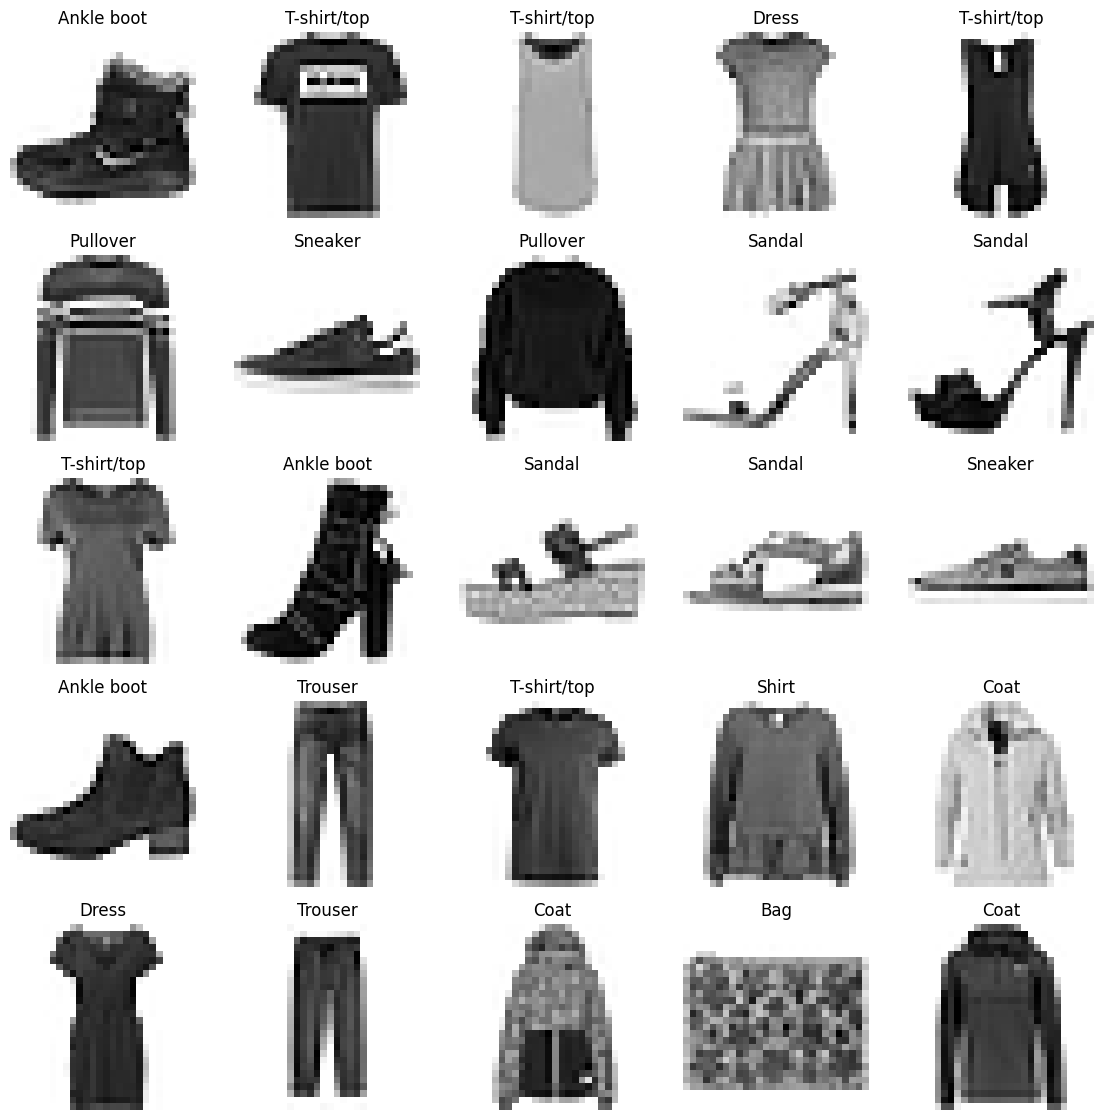

In [24]:
# Class names
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
plt.figure(figsize=(14, 14))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels,epochs=10,batch_size=32,validation_data=(test_images, test_labels))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7812 - loss: 0.6212 - val_accuracy: 0.8463 - val_loss: 0.4109
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8662 - loss: 0.3650 - val_accuracy: 0.8482 - val_loss: 0.4099
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8746 - loss: 0.3364 - val_accuracy: 0.8544 - val_loss: 0.3999
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8889 - loss: 0.3044 - val_accuracy: 0.8680 - val_loss: 0.3601
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8891 - loss: 0.2935 - val_accuracy: 0.8745 - val_loss: 0.3519
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8986 - loss: 0.2735 - val_accuracy: 0.8648 - val_loss: 0.3616
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.2592 - val_accuracy: 0.8751 - val_loss: 0.3440
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9057 - loss: 0.2479 - 

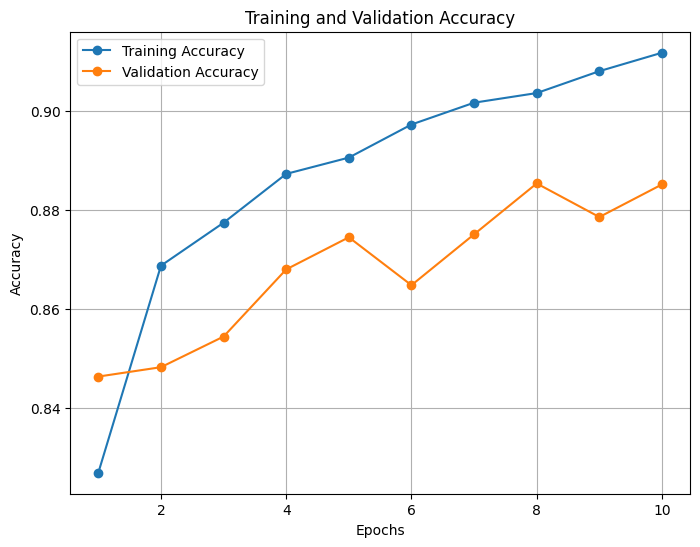

In [28]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


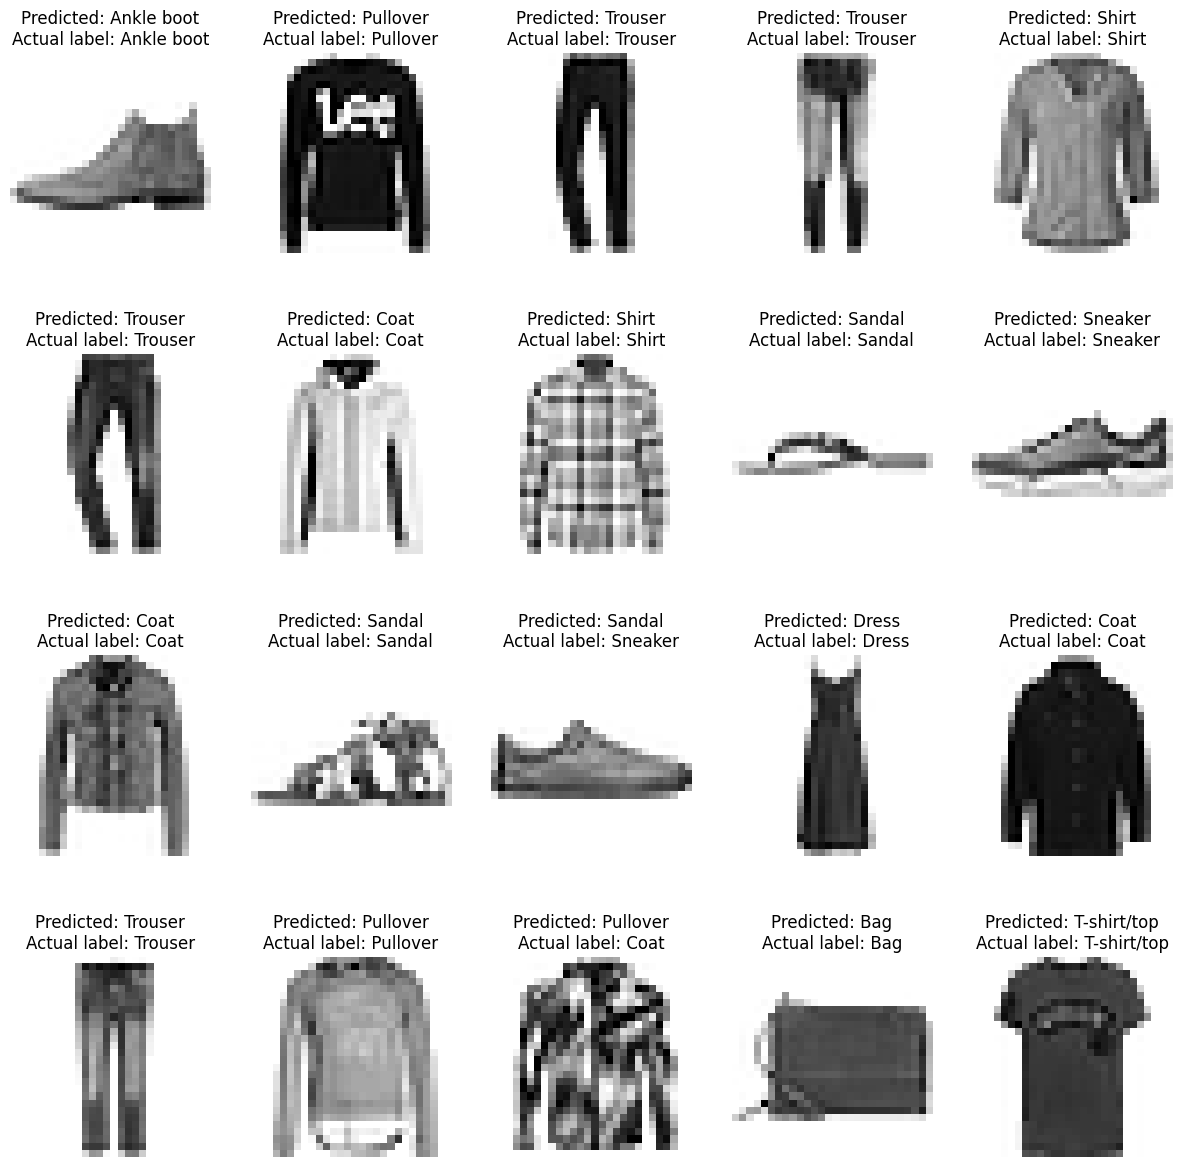

In [29]:
predictions = model.predict(test_images)
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {class_names[tf.argmax(predictions[i]).numpy()]}\nActual label: {class_names[test_labels[i]]}")
    plt.axis('off')
plt.show()